In [1]:
#Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
#Import arrest data
arrest_df = pd.read_csv(r"C:\Users\barrb\Downloads\e03a89dd-134a-4ee8-a2bd-62c40aeebc6f (1).csv")

In [8]:
#Reduce columns to only necessary ones
arrest_columns = ['AGE', 'GENDER', 'RACE','OFFENSES', 'ARRESTTIME','INCIDENTZONE','INCIDENTNEIGHBORHOOD','X', 'Y']

In [9]:
#Create new dataframe to reference new columns
arrest_pitt_df = arrest_df[arrest_columns]

In [10]:
arrest_pitt_df

,AGE,GENDER,RACE,OFFENSES,ARRESTTIME,INCIDENTZONE,INCIDENTNEIGHBORHOOD,X,Y
0,42.0,F,B,3929 Retail Theft.,2016-08-24T12:20:00,5,Bloomfield,-79.949277,40.452551
1,31.0,M,W,13(a)(16) Possession of Controlled Substance,2016-08-03T14:55:00,OSC,Outside City,-80.088018,40.440136
2,63.0,F,B,3929 Retail Theft.,2016-08-03T16:45:00,5,Westwood,-79.891803,40.486625
3,25.0,F,W,5503 Disorderly Conduct. / 5505 Public Drunken...,2016-08-05T02:36:00,1,East Allegheny,-80.001939,40.454080
4,25.0,M,B,2702 Aggravated Assault. / 2705 Recklessy Enda...,2016-08-06T02:00:00,5,Crafton Heights,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...
66478,40.0,M,W,3304 Criminal Mischief. / 3502 Burglary. / 392...,2023-11-05T16:19:00,1,Manchester,-80.026065,40.453105
66479,44.0,F,B,5104 Resisting Arrest or Other Law Enforcement...,2023-11-11T03:41:00,6,Brookline,-80.019190,40.392879
66480,18.0,M,B,2702 Aggravated Assault. / 2705 Recklessy Enda...,2023-11-04T00:49:00,3,Homewood North,NaN,NaN
66481,32.0,M,B,9501 Bench Warrant,2023-09-14T23:44:00,OSC,Outside City,-80.255272,40.496059


In [30]:
#Change DATE to datetime in order to make a line graph of arrests by year

In [17]:
arrest_pitt_df = arrest_pitt_df.rename(columns={
    'ARRESTTIME': 'DATE',})

In [18]:
arrest_pitt_df['DATE'] = pd.to_datetime(arrest_pitt_df['DATE'])

In [19]:
arrest_pitt_df['YEAR'] = [x.year for x in arrest_pitt_df['DATE']]

In [42]:
arrest_pitt_by_year = arrest_pitt_df.loc[(arrest_pitt_df['YEAR'] >= 2017) & (arrest_pitt_df['YEAR'] <= 2023)].\
                    groupby(['YEAR']).\
                    aggregate(Offenses = ('OFFENSES','count')).\
                    reset_index().\
                    set_index('YEAR').\
                    copy()

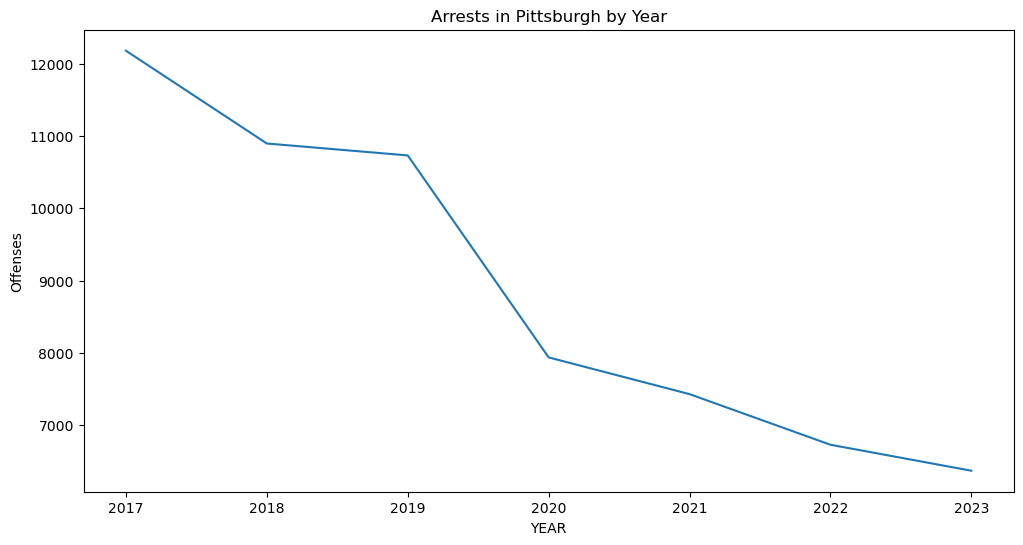

In [44]:
plt.figure(figsize=(12,6))
sns.lineplot(data=arrest_pitt_by_year, x="YEAR", y="Offenses")
plt.title('Arrests in Pittsburgh by Year')
plt.show()

In [31]:
#Plot a bar graph of the total numbers of arrests by zone

In [34]:
arrests_by_zone = arrest_pitt_df.groupby(['INCIDENTZONE']).\
aggregate(arrest_count_zone = ('OFFENSES', 'count')).\
reset_index()

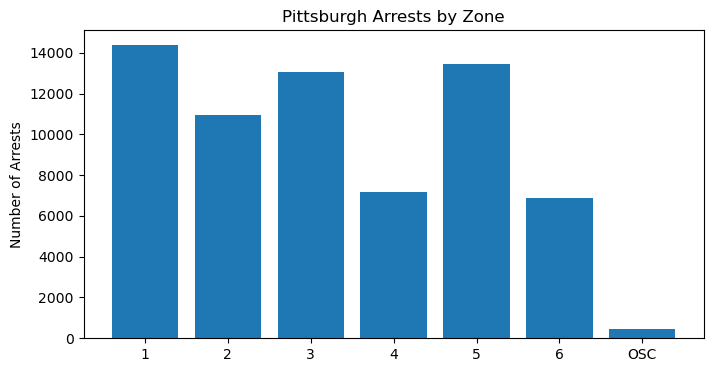

In [36]:
plt.figure(figsize=(8,4))
plt.bar(arrests_by_zone['INCIDENTZONE'],
        arrests_by_zone['arrest_count_zone'],
        0.8)
plt.title('Pittsburgh Arrests by Zone')
plt.ylabel('Number of Arrests')
plt.show()

In [80]:
#Create graph of portion of arrest by race for each year

In [84]:
white_arrest = arrest_pitt_df[arrest_pitt_df['RACE']== "W"]
black_arrest = arrest_pitt_df[arrest_pitt_df['RACE']== "B"]

In [85]:
white_arrest_count = white_arrest.groupby(['YEAR', 'OFFENSES']).size().reset_index(name='count')
black_arrest_count = black_arrest.groupby(['YEAR', 'OFFENSES']).size().reset_index(name='count')

In [86]:
white_arrest_count_year = white_arrest[white_arrest['YEAR']>=2016]
black_arrest_count_year = black_arrest[black_arrest['YEAR']>=2016]

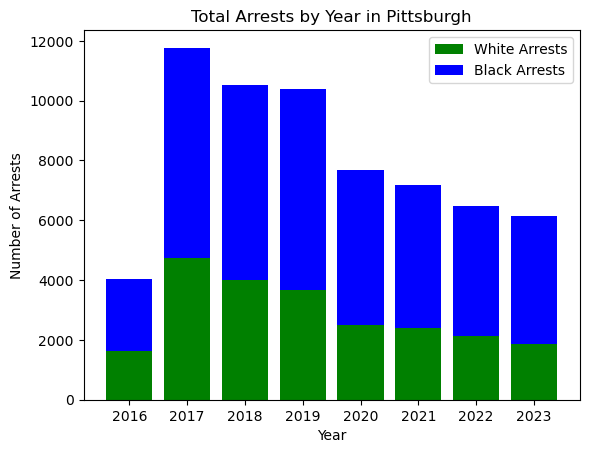

In [132]:
x = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
y1 = white_arrest_count_year.groupby(['YEAR']).size()
y2 = black_arrest_count_year.groupby(['YEAR']).size()

plt.bar(x, y1,color='green')
plt.bar(x, y2, bottom=y1, color='blue')
plt.legend(["White Arrests", "Black Arrests"])
plt.title('Total Arrests by Year in Pittsburgh')
plt.ylabel('Number of Arrests')
plt.xlabel('Year')
plt.show()

In [96]:
#Create a pivot table so we can turn this into a stacked bar chart
arrest_zone_race_BHW = arrest_pitt_df.loc[arrest_pitt_df['RACE'].isin(['B','H','W'])].\
  groupby(['INCIDENTZONE','RACE']).\
  aggregate(arrest_count_zone_race =('OFFENSES', 'count')).\
  reset_index().\
  copy()

In [99]:
arrest_zone_race_pivot = arrest_zone_race_BHW.pivot(index=['INCIDENTZONE'],
                                               columns ='RACE',values='arrest_count_zone_race').\
copy()

In [120]:
arrest_by_zone_BHW = arrest_pitt_df.loc[arrest_pitt_df['RACE'].isin(['B','H','W'])].\
  groupby(['INCIDENTZONE']).\
  aggregate(arrest_count_zone = ('OFFENSES', 'count')).\
  reset_index().\
  copy()

In [121]:
arrest_zone_race_pvt = arrest_zone_race_BHW.pivot(index=['INCIDENTZONE'], columns='RACE', values='arrest_count_zone_race').\
reset_index().\
copy()

In [123]:
arrest_zone_race_with_totals = arrest_zone_race_pvt.merge(arrest_by_zone_BHW, how='left', on=['INCIDENTZONE'])

In [124]:
arrest_zone_race_with_totals

,INCIDENTZONE,B,H,W,arrest_count_zone
0,1,9012,118,5040,14170
1,2,7235,85,3390,10710
2,3,6298,209,6183,12690
3,4,4102,79,2763,6944
4,5,10817,79,2368,13264
5,6,3472,156,3057,6685
6,OSC,328,2,115,445


In [126]:
#Create portions for each race
arrest_zone_race_with_totals['Black']= arrest_zone_race_with_totals['B']/arrest_zone_race_with_totals['arrest_count_zone']
arrest_zone_race_with_totals['Hispanic']= arrest_zone_race_with_totals['H']/arrest_zone_race_with_totals['arrest_count_zone']
arrest_zone_race_with_totals['White']= arrest_zone_race_with_totals['W']/arrest_zone_race_with_totals['arrest_count_zone']
arrest_zone_race_with_totals['grand_total'] = arrest_zone_race_with_totals['B'] + arrest_zone_race_with_totals['H'] + arrest_zone_race_with_totals['W']

In [129]:
arrest_proportions_df = arrest_zone_race_with_totals.loc[:,['INCIDENTZONE','Black','Hispanic','White']].\
copy()

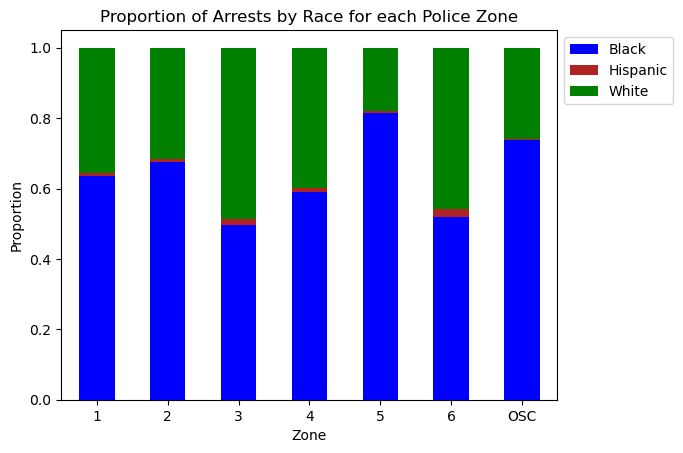

In [138]:
#Create stacked bar graph for arrests by zone and race
color = ['blue', 'Firebrick', 'green']
arrest_proportions_df.\
plot(x='INCIDENTZONE',kind='bar', color=color, stacked=True)
plt.title('Proportion of Arrests by Race for each Police Zone')
plt.xlabel('Zone')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.show()